In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

Import the data from medical_examination.csv and assign it to the df variable.


In [3]:
df = pd.read_csv("medical_examination.csv")
print(df)

          id    age  gender  height  weight  ap_hi  ap_lo  cholesterol  gluc  \
0          0  18393       2     168    62.0    110     80            1     1   
1          1  20228       1     156    85.0    140     90            3     1   
2          2  18857       1     165    64.0    130     70            3     1   
3          3  17623       2     169    82.0    150    100            1     1   
4          4  17474       1     156    56.0    100     60            1     1   
...      ...    ...     ...     ...     ...    ...    ...          ...   ...   
69995  99993  19240       2     168    76.0    120     80            1     1   
69996  99995  22601       1     158   126.0    140     90            2     2   
69997  99996  19066       2     183   105.0    180     90            3     1   
69998  99998  22431       1     163    72.0    135     80            1     2   
69999  99999  20540       1     170    72.0    120     80            2     1   

       smoke  alco  active  cardio  
0 

Add an overweight column to the data. To determine if a person is overweight, first calculate their BMI by dividing their weight in kilograms by the square of their height in meters. If that value is > 25 then the person is overweight. Use the value 0 for NOT overweight and the value 1 for overweight.


In [5]:
df["overweight"] = (df["weight"] / (df["height"]/100)**2 > 25).astype(int)
print(df)

          id    age  gender  height  weight  ap_hi  ap_lo  cholesterol  gluc  \
0          0  18393       2     168    62.0    110     80            1     1   
1          1  20228       1     156    85.0    140     90            3     1   
2          2  18857       1     165    64.0    130     70            3     1   
3          3  17623       2     169    82.0    150    100            1     1   
4          4  17474       1     156    56.0    100     60            1     1   
...      ...    ...     ...     ...     ...    ...    ...          ...   ...   
69995  99993  19240       2     168    76.0    120     80            1     1   
69996  99995  22601       1     158   126.0    140     90            2     2   
69997  99996  19066       2     183   105.0    180     90            3     1   
69998  99998  22431       1     163    72.0    135     80            1     2   
69999  99999  20540       1     170    72.0    120     80            2     1   

       smoke  alco  active  cardio  ove

Normalize data by making 0 always good and 1 always bad. If the value of cholesterol or gluc is 1, set the value to 0. If the value is more than 1, set the value to 1.

In [8]:
df['cholesterol'] = (df['cholesterol'] > 1).astype(int)
df['gluc'] = (df['gluc'] > 1).astype(int)
print(df)

          id    age  gender  height  weight  ap_hi  ap_lo  cholesterol  gluc  \
0          0  18393       2     168    62.0    110     80            0     0   
1          1  20228       1     156    85.0    140     90            1     0   
2          2  18857       1     165    64.0    130     70            1     0   
3          3  17623       2     169    82.0    150    100            0     0   
4          4  17474       1     156    56.0    100     60            0     0   
...      ...    ...     ...     ...     ...    ...    ...          ...   ...   
69995  99993  19240       2     168    76.0    120     80            0     0   
69996  99995  22601       1     158   126.0    140     90            1     1   
69997  99996  19066       2     183   105.0    180     90            1     0   
69998  99998  22431       1     163    72.0    135     80            0     1   
69999  99999  20540       1     170    72.0    120     80            1     0   

       smoke  alco  active  cardio  ove

Draw the Categorical Plot in the draw_cat_plot function.

Create a DataFrame for the cat plot using pd.melt with values from cholesterol, gluc, smoke, alco, active, and overweight in the df_cat variable.

Group and reformat the data in df_cat to split it by cardio. Show the counts of each feature. You will have to rename one of the columns for the catplot to work correctly.

Convert the data into long format and create a chart that shows the value counts of the categorical features using the following method provided by the seaborn library import: sns.catplot().

Get the figure for the output and store it in the fig variable.

Do not modify the next two lines.


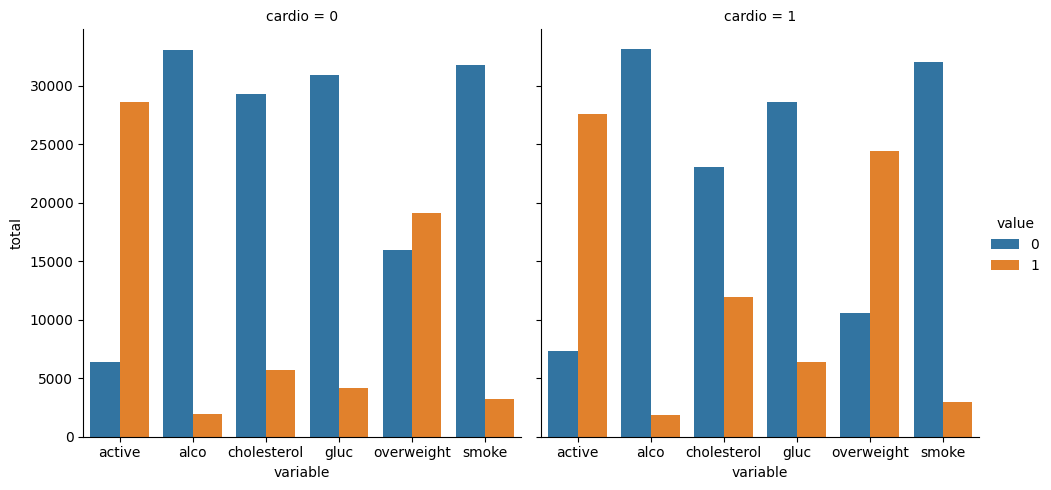

In [12]:
df_cat = pd.melt(df,id_vars = ['cardio'], value_vars = ['cholesterol','gluc','smoke','alco','active','overweight'])
df_cat = df_cat.groupby(['cardio','variable','value']).size().reset_index()
df_cat = df_cat.rename(columns = {0: 'total'})

# drawing the catplot
graph = sns.catplot(data = df_cat, kind = 'bar', x = 'variable', y = 'total', hue = 'value', col = 'cardio')
fig = graph.fig
fig.savefig('catplot.png')

Draw the Heat Map in the draw_heat_map function.

Clean the data in the df_heat variable by filtering out the following patient segments that represent incorrect data:
diastolic pressure is higher than systolic (Keep the correct data with (df['ap_lo'] <= df['ap_hi']))
height is less than the 2.5th percentile (Keep the correct data with (df['height'] >= df['height'].quantile(0.025)))
height is more than the 97.5th percentile
weight is less than the 2.5th percentile
weight is more than the 97.5th percentile

Calculate the correlation matrix and store it in the corr variable.

Generate a mask for the upper triangle and store it in the mask variable.

Set up the matplotlib figure.

Plot the correlation matrix using the method provided by the seaborn library import: sns.heatmap().

Do not modify the next two lines.


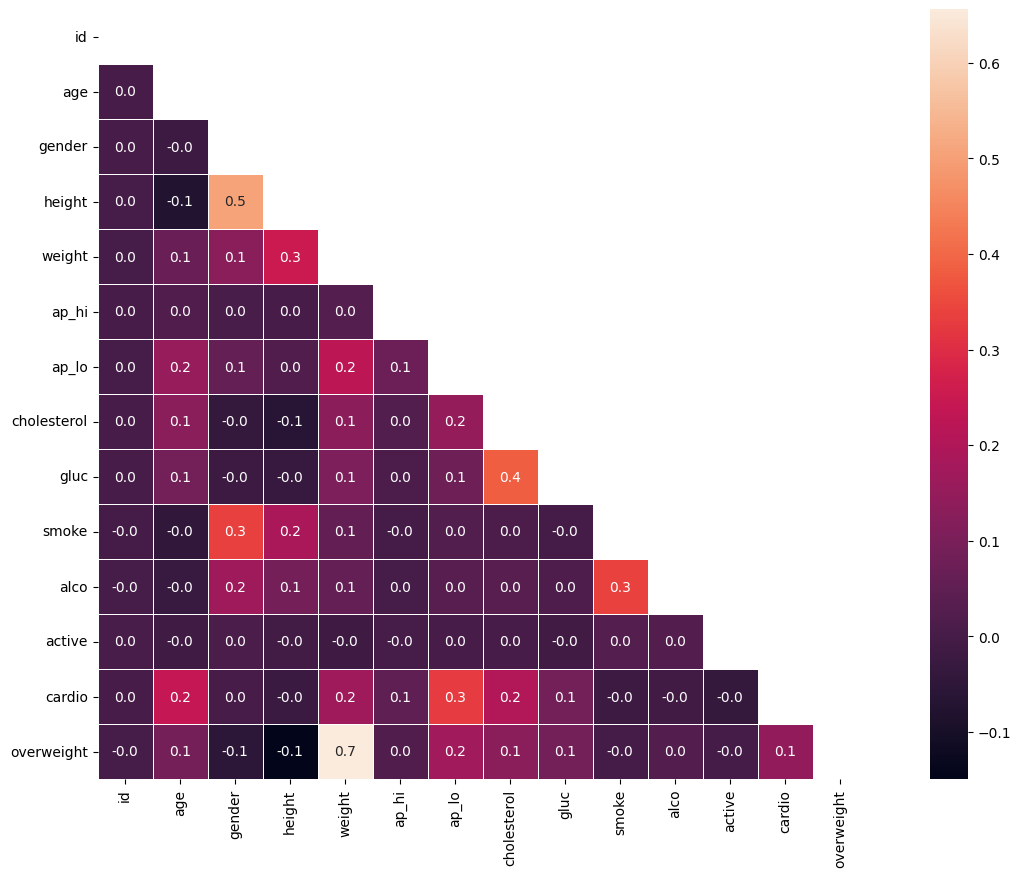

In [15]:
df_heat = df[(df['ap_lo'] <= df['ap_hi']) & 
            (df['height'] >= df['height'].quantile(0.025)) &
            (df['height'] <= df['height'].quantile(0.975)) &
            (df['weight'] >= df['weight'].quantile(0.025)) &
            (df['weight'] <= df['weight'].quantile(0.975))]

# correlation matrix
corr = df_heat.corr()

 # generating a mask for the upper triangle
mask = np.triu(np.ones_like(corr,dtype = bool))

fig, ax  = plt.subplots(figsize = (16,10))

# drawing the heatmap
sns.heatmap(corr,mask = mask, square = True, linewidths = 0.5, annot = True, fmt = "0.1f")
fig.savefig('heatmap.png')

